In [5]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\ticar\AppData\Local\Temp\ipykernel_44000\1127981252.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:

sleepschedule = [
    {
        "range": [0, 2],
        "hours": [11, 14]
    },
    {
        "range": [4, 12],
        "hours": [12, 16]
    },
    {
        "range": [3, 5],
        "hours": [10, 13]
    },
    {
        "range": [6, 12],
        "hours": [9, 12]
    },
    {
        "range": [13, 17],
        "hours": [8, 10]
    }
]
usageHoursWeekday = {
    0: 5.168,
    0.5: 4.788,
    1.0: 4.294,
    1.5: 4.018,
    2.0: 3.635,
    2.5: 3.523,
    3.0: 3.287,
    3.5: 3.286,
    4.0: 3.137,
    4.5: 3.189,
    5.0: 3.157,
    5.5: 3.281,
    6.0: 3.431,
    6.5: 3.795,
    7.0: 4.113,
    7.5: 4.695,
    8.0: 5.344,
    8.5: 6.155,
    9.0: 6.668,
    9.5: 7.241,
    10.0: 7.101,
    10.5: 7.404,
    11.0: 7.263,
    11.5: 7.369,
    12.0: 7.206,
    12.5: 7.212,
    13.0: 6.992,
    13.5: 7.231,
    14.0: 7.536,
    14.5: 7.649,
    15.0: 7.497,
    15.5: 7.659,
    16.0: 7.805,
    16.5: 7.864,
    17.0: 7.759,
    17.5: 7.679,
    18.0: 7.527,
    18.5: 7.723,
    19.0: 7.756,
    19.5: 7.882,
    20.0: 7.985,
    20.5: 8.111,
    21.0: 8.019,
    21.5: 7.913,
    22.0: 7.564,
    22.5: 7.093,
    23.0: 6.455,
    23.5: 5.844,
}
totalMbWeekdayOriginalCurve = 0
for day in usageHoursWeekday:
    totalMbWeekdayOriginalCurve += usageHoursWeekday[day]
weekdayAreaUnderCurve = totalMbWeekdayOriginalCurve * 0.5
usageHoursWeekend = {
    0: 5.745,
    0.5: 5.383,
    1.0: 4.838,
    1.5: 4.525,
    2.0: 4.103,
    2.5: 3.902,
    3.0: 3.584,
    3.5: 3.519,
    4.0: 3.338,
    4.5: 3.339,
    5.0: 3.308,
    5.5: 3.319,
    6.0: 3.364,
    6.5: 3.651,
    7.0: 3.698,
    7.5: 4.041,
    8.0: 4.359,
    8.5: 4.817,
    9.0: 5.202,
    9.5: 5.492,
    10.0: 5.667,
    10.5: 5.939,
    11.0: 5.976,
    11.5: 6.048,
    12.0: 6.283,
    12.5: 6.303,
    13.0: 6.404,
    13.5: 6.601,
    14.0: 6.714,
    14.5: 6.868,
    15.0: 6.965,
    15.5: 6.994,
    16.0: 7.207,
    16.5: 7.864,
    17.0: 7.759,
    17.5: 7.679,
    18.0: 7.847,
    18.5: 7.865,
    19.0: 7.973,
    19.5: 8.102,
    20.0: 7.968,
    20.5: 7.858,
    21.0: 7.768,
    21.5: 7.843,
    22.0: 7.582,
    22.5: 7.372,
    23.0: 6.829,
    23.5: 6.254,
}
totalMbweekendOriginalCurve = 0
for day in usageHoursWeekend:
    totalMbweekendOriginalCurve += usageHoursWeekend[day]
weekendAreaUnderCurve = totalMbweekendOriginalCurve * 0.5

# make numpy array of values
weekdayNpY = np.array(list(usageHoursWeekday.values())).reshape(-1, 1)
weekendNpY = np.array(list(usageHoursWeekend.values())).reshape(-1, 1)

Weekday initial area under curve:  144.8985
Weekend area under curve:  138.02975


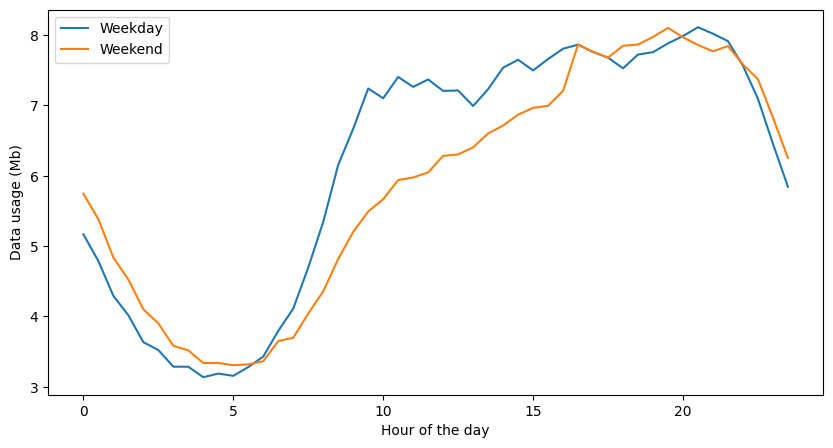

In [7]:
# plot the data
plt.figure(figsize=(10, 5))
plt.plot(usageHoursWeekday.keys(), usageHoursWeekday.values(), label="Weekday")
plt.plot(usageHoursWeekend.keys(), usageHoursWeekend.values(), label="Weekend")
plt.xlabel("Hour of the day")
plt.ylabel("Data usage (Mb)")
plt.legend()

# calculate the area under the plot using numpy
# multiplying by 0.5 because the x axis is in 0.5 increments
weekdayAreaUnderCurve = np.trapz(weekdayNpY, axis=0)*0.5
weekdayAreaUnderCurve = weekdayAreaUnderCurve[0]

weekendAreaUnderCurve = np.trapz(weekendNpY, axis=0)*0.5
weekendAreaUnderCurve = weekendAreaUnderCurve[0]

print("Weekday initial area under curve: ", weekdayAreaUnderCurve)
print("Weekend area under curve: ", weekendAreaUnderCurve)
plt.show()

In [8]:
# manually calculate the total Mb used by a given person per week by multiplying how many hours 
# that given person does a given activity by the Mb used per hour for that activity then
# summing all the activities

# we spl

totalPersonMbPerWeek = 1

# weighted mean of the Mb per week into Mb per weekday and Mb per weekend day based
# off bandwidth usage during weekends compared to weekdays in the given reference data
totalPersonMbWeekday = weekdayAreaUnderCurve/(weekdayAreaUnderCurve*5 + weekendAreaUnderCurve*2) * totalPersonMbPerWeek
totalPersonMbWeekend = weekendAreaUnderCurve/(weekdayAreaUnderCurve*5 + weekendAreaUnderCurve*2) * totalPersonMbPerWeek
print("Total person Mb per week: ", totalPersonMbPerWeek)
print("Total person Mb per weekday: ", totalPersonMbWeekday)
print("Total person Mb per weekend: ", totalPersonMbWeekend)

Total person Mb per week:  1
Total person Mb per weekday:  0.14481856015479455
Total person Mb per weekend:  0.1379535996130136
